Importing Libraries

In [1]:
!pip install optuna
!pip install optuna-integration[tfkeras]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, confusion_matrix,
                             classification_report, make_scorer)
import xgboost as xgb
import lightgbm as lgb
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import optuna
from optuna.integration import TFKerasPruningCallback
import warnings
warnings.filterwarnings('ignore')


np.random.seed(42)
optuna.logging.set_verbosity(optuna.logging.WARNING)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



print("Libraries imported successfully!")

Libraries imported successfully!


Data set

In [3]:
!wget -O /content/Data https://www.dropbox.com/scl/fi/e9hikepsn21u207qhiit0/dataset.csv?rlkey=msrqmse26sio93bwpgopyp49s&st=gphpu32s&dl=0

df = pd.read_csv('/content/Data')
df

--2025-10-16 04:06:43--  https://www.dropbox.com/scl/fi/e9hikepsn21u207qhiit0/dataset.csv?rlkey=msrqmse26sio93bwpgopyp49s
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4886224bc2b15b72d8c284e556.dl.dropboxusercontent.com/cd/0/inline/CzUA624V5JPGtmEX6KmHnyJSVIm1SDX3ZWV6wO4YxiNjCS33NrITF53R-jSEymrHvqzKJ7ZDzZCo2V5Qn-H2I4vXd52Ja8ZokNcXRZWvLbBtSZHj2xUhzNjQhm94C17Vb_tTDfeJKx7Zh1p0u1YlZGWJ/file# [following]
--2025-10-16 04:06:44--  https://uc4886224bc2b15b72d8c284e556.dl.dropboxusercontent.com/cd/0/inline/CzUA624V5JPGtmEX6KmHnyJSVIm1SDX3ZWV6wO4YxiNjCS33NrITF53R-jSEymrHvqzKJ7ZDzZCo2V5Qn-H2I4vXd52Ja8ZokNcXRZWvLbBtSZHj2xUhzNjQhm94C17Vb_tTDfeJKx7Zh1p0u1YlZGWJ/file
Resolving uc4886224bc2b15b72d8c284e556.dl.dropboxusercontent.com (uc4886224bc2b15b72d8c284e556.dl.dropboxusercontent.com)... 162.125.1.15, 2620:10

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [4]:
print("\n1.1 Dataset Overview")
print("-" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

print("\n1.2 First Few Records:")
print(df.head())

print("\n1.3 Data Types and Info:")
print(df.info())

print("\n1.4 Statistical Summary:")
print(df.describe())

# 1.1 Identify Key Features
print("\n1.5 Key Features Identified:")
print("-" * 50)
feature_types = {
    'Numerical': ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer',
                  'Num_of_Purchases', 'Average_Transaction_Amount', 'Num_of_Returns',
                  'Num_of_Support_Contacts', 'Satisfaction_Score', 'Last_Purchase_Days_Ago'],
    'Categorical': ['Gender', 'Email_Opt_In', 'Promotion_Response'],
    'Target': ['Target_Churn']
}

for ftype, features in feature_types.items():
    print(f"\n{ftype} Features ({len(features)}):")
    print(", ".join(features))



1.1 Dataset Overview
--------------------------------------------------
Dataset Shape: (1000, 15)
Number of Records: 1000
Number of Features: 15

1.2 First Few Records:
   Customer_ID  Age Gender  Annual_Income  Total_Spend  Years_as_Customer  \
0            1   62  Other          45.15      5892.58                  5   
1            2   65   Male          79.51      9025.47                 13   
2            3   18   Male          29.19       618.83                 13   
3            4   21  Other          79.63      9110.30                  3   
4            5   21  Other          77.66      5390.88                 15   

   Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0                22                      453.80               2   
1                77                       22.90               2   
2                71                       50.53               5   
3                33                      411.83               5   
4                43             

Data Preprocessing

In [5]:
print("Missing Values Check:")

missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

print("Duplicate Records Check:")

duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

Missing Values Check:
No missing values found!
Duplicate Records Check:
Number of duplicate records: 0


In [6]:
df = df.drop(columns=['Customer_ID'])

Data Visualization

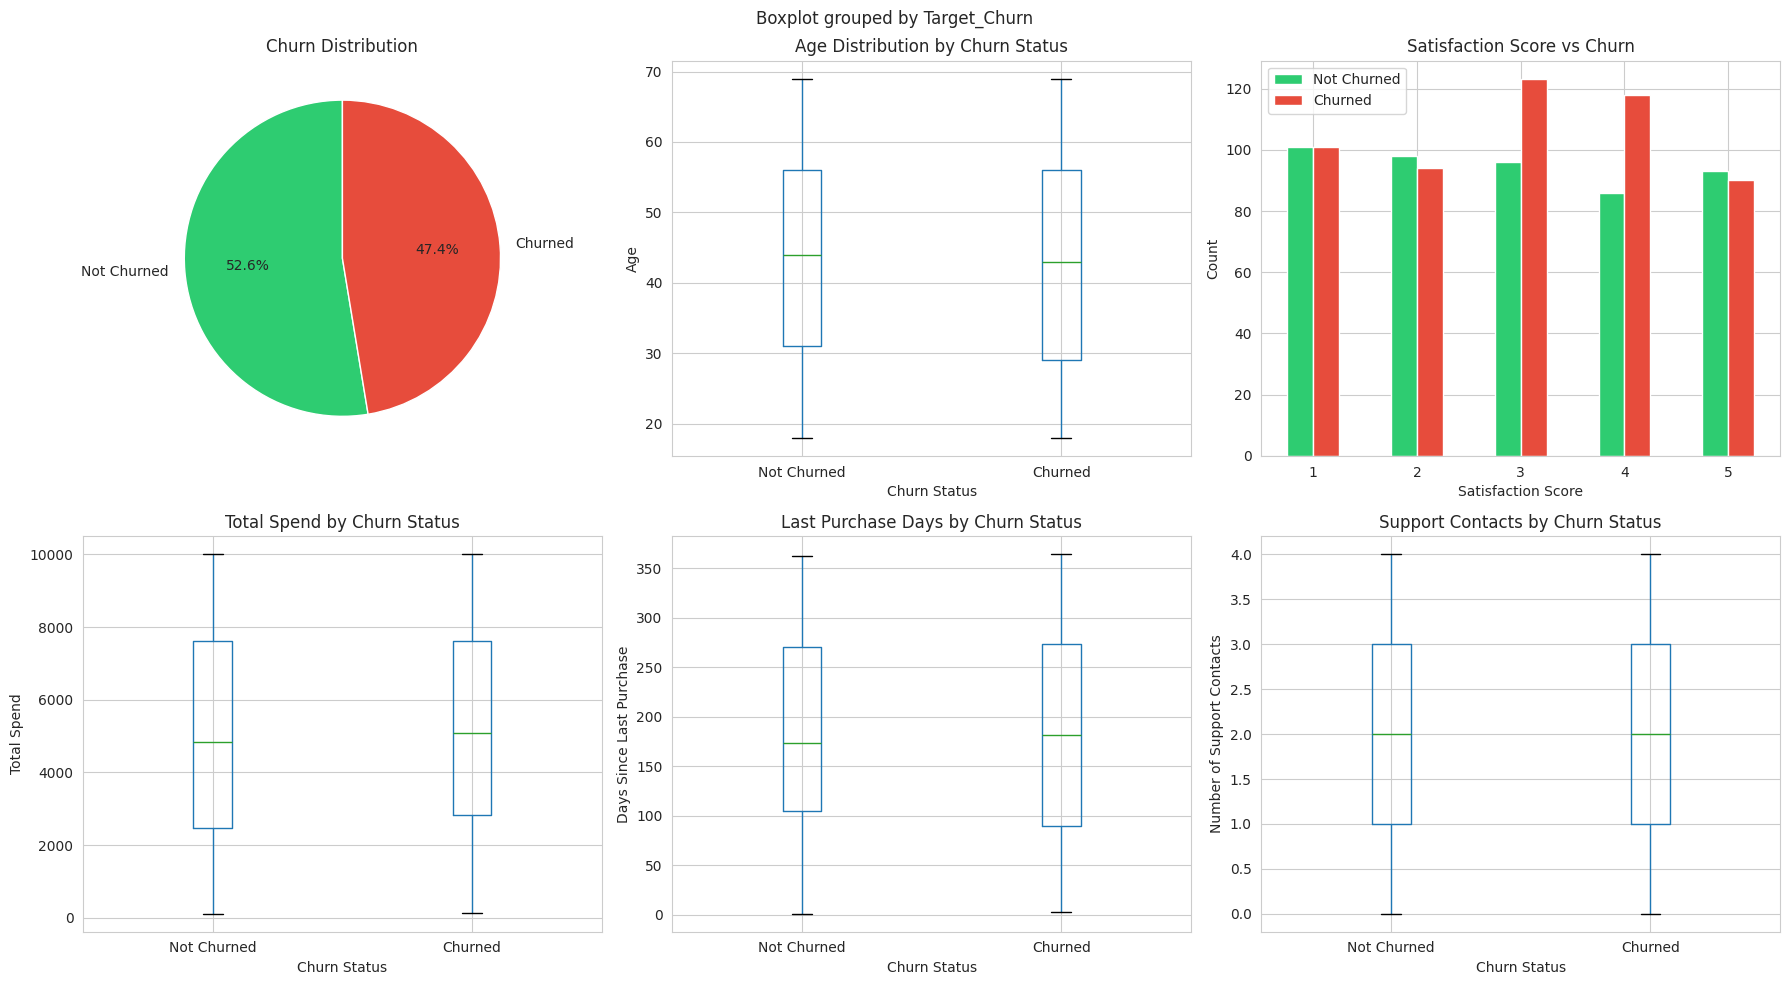

In [7]:
# Target Distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Exploratory Data Analysis - Key Visualizations', fontsize=16, fontweight='bold')

# 1. Target Distribution
churn_counts = df['Target_Churn'].value_counts()
axes[0, 0].pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%',
               colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[0, 0].set_title('Churn Distribution')

# 2. Age Distribution by Churn
df.boxplot(column='Age', by='Target_Churn', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Churn Status')
axes[0, 1].set_xlabel('Churn Status')
axes[0, 1].set_ylabel('Age')
plt.sca(axes[0, 1])
plt.xticks([1, 2], ['Not Churned', 'Churned'])

# 3. Satisfaction Score vs Churn
satisfaction_churn = df.groupby(['Satisfaction_Score', 'Target_Churn']).size().unstack(fill_value=0)
satisfaction_churn.plot(kind='bar', ax=axes[0, 2], color=['#2ecc71', '#e74c3c'])
axes[0, 2].set_title('Satisfaction Score vs Churn')
axes[0, 2].set_xlabel('Satisfaction Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].legend(['Not Churned', 'Churned'])
axes[0, 2].tick_params(axis='x', rotation=0)

# 4. Total Spend Distribution
df.boxplot(column='Total_Spend', by='Target_Churn', ax=axes[1, 0])
axes[1, 0].set_title('Total Spend by Churn Status')
axes[1, 0].set_xlabel('Churn Status')
axes[1, 0].set_ylabel('Total Spend')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Not Churned', 'Churned'])

# 5. Last Purchase Days
df.boxplot(column='Last_Purchase_Days_Ago', by='Target_Churn', ax=axes[1, 1])
axes[1, 1].set_title('Last Purchase Days by Churn Status')
axes[1, 1].set_xlabel('Churn Status')
axes[1, 1].set_ylabel('Days Since Last Purchase')
plt.sca(axes[1, 1])
plt.xticks([1, 2], ['Not Churned', 'Churned'])

# 6. Support Contacts
df.boxplot(column='Num_of_Support_Contacts', by='Target_Churn', ax=axes[1, 2])
axes[1, 2].set_title('Support Contacts by Churn Status')
axes[1, 2].set_xlabel('Churn Status')
axes[1, 2].set_ylabel('Number of Support Contacts')
plt.sca(axes[1, 2])
plt.xticks([1, 2], ['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

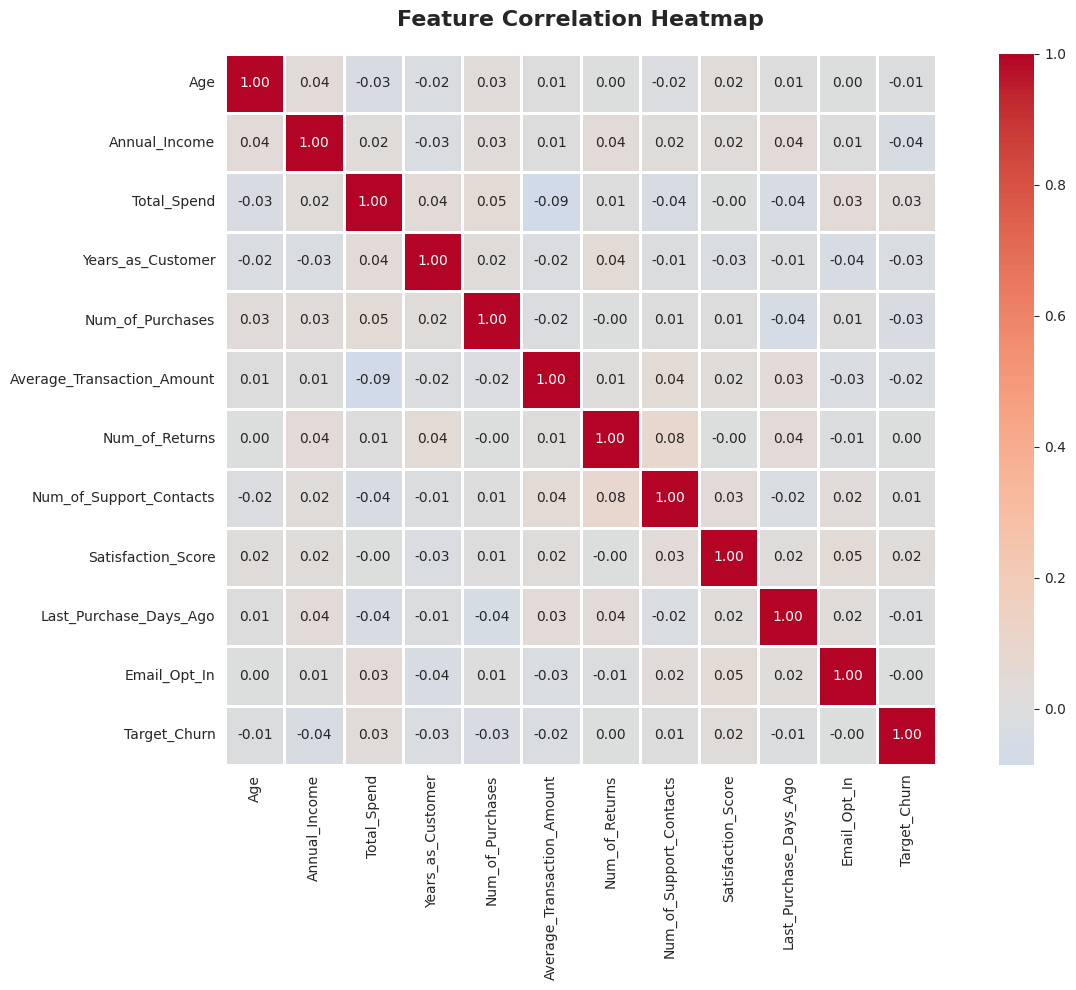

In [8]:
#heatmap generation

plt.figure(figsize=(14, 10))
# Prepare numerical data
df_numeric = df.copy()
df_numeric['Target_Churn'] = df_numeric['Target_Churn'].astype(int)
df_numeric['Email_Opt_In'] = df_numeric['Email_Opt_In'].astype(int)

# Select only numerical columns
numeric_cols = df_numeric.select_dtypes(include=[np.number]).columns
correlation_matrix = df_numeric[numeric_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [9]:
# Calculate correlation with target
target_correlation = correlation_matrix['Target_Churn'].drop('Target_Churn').sort_values(ascending=False)
print("\nCorrelation with Churn (Top 10):")
print(target_correlation.abs().sort_values(ascending=False).head(10))


Correlation with Churn (Top 10):
Annual_Income                 0.036322
Num_of_Purchases              0.032772
Years_as_Customer             0.029823
Total_Spend                   0.028659
Average_Transaction_Amount    0.024723
Satisfaction_Score            0.022567
Last_Purchase_Days_Ago        0.013823
Num_of_Support_Contacts       0.009593
Age                           0.009260
Email_Opt_In                  0.001019
Name: Target_Churn, dtype: float64


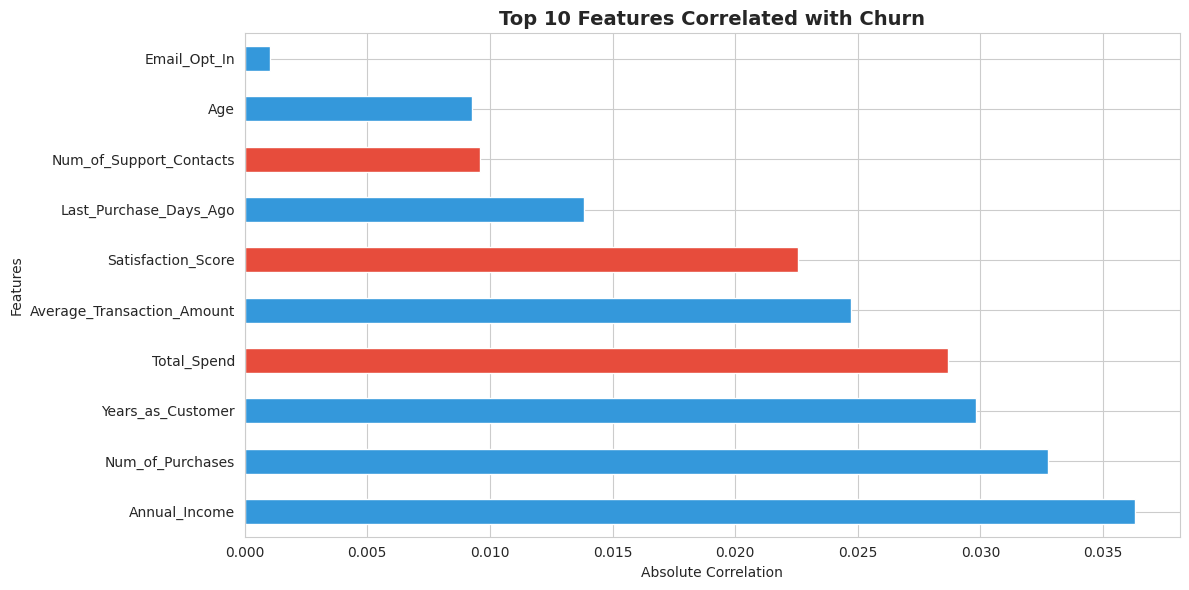

In [10]:
# Visualize top features
plt.figure(figsize=(12, 6))
top_features = target_correlation.abs().sort_values(ascending=False).head(10)
colors = ['#e74c3c' if x > 0 else '#3498db' for x in target_correlation[top_features.index]]
top_features.plot(kind='barh', color=colors)
plt.title('Top 10 Features Correlated with Churn', fontsize=14, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

Trend and Patterns

In [11]:
# Pattern 1: Satisfaction Score Analysis
print("\n• Satisfaction Score Impact:")
satisfaction_churn_rate = df.groupby('Satisfaction_Score')['Target_Churn'].mean() * 100
print(satisfaction_churn_rate.to_string())

# Pattern 2: Returns and Churn
print("\n• Returns Analysis:")
returns_stats = df.groupby('Target_Churn')['Num_of_Returns'].agg(['mean', 'median', 'std'])
returns_stats.index = ['Not Churned', 'Churned']
print(returns_stats)

# Pattern 3: Support Contacts
print("\n• Support Contacts Analysis:")
support_stats = df.groupby('Target_Churn')['Num_of_Support_Contacts'].agg(['mean', 'median', 'std'])
support_stats.index = ['Not Churned', 'Churned']
print(support_stats)

# Pattern 4: Recency
print("\n• Purchase Recency Analysis:")
recency_stats = df.groupby('Target_Churn')['Last_Purchase_Days_Ago'].agg(['mean', 'median', 'std'])
recency_stats.index = ['Not Churned', 'Churned']
print(recency_stats)


• Satisfaction Score Impact:
Satisfaction_Score
1    50.000000
2    48.958333
3    56.164384
4    57.843137
5    49.180328

• Returns Analysis:
                 mean  median       std
Not Churned  4.611814     5.0  2.975081
Churned      4.612167     5.0  2.827377

• Support Contacts Analysis:
                 mean  median       std
Not Churned  1.919831     2.0  1.399905
Churned      1.946768     2.0  1.406454

• Purchase Recency Analysis:
                   mean  median         std
Not Churned  184.409283   174.0  102.860017
Churned      181.520913   182.0  105.831342


# Data Preprocessing

In [12]:
# Create a copy for preprocessing
df_processed = df.copy()

print("Encoding Categorical Features")
# Encode Gender
le_gender = LabelEncoder()
df_processed['Gender_Encoded'] = le_gender.fit_transform(df_processed['Gender'])
print(f"Gender encoding: {dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))}")

# Encode Promotion_Response
le_promo = LabelEncoder()
df_processed['Promotion_Response_Encoded'] = le_promo.fit_transform(df_processed['Promotion_Response'])
print(f"Promotion Response encoding: {dict(zip(le_promo.classes_, le_promo.transform(le_promo.classes_)))}")

# Encode Email_Opt_In (boolean to binary)
df_processed['Email_Opt_In_Encoded'] = df_processed['Email_Opt_In'].astype(int)

# Encode Target
df_processed['Target_Encoded'] = df_processed['Target_Churn'].astype(int)

# Drop original categorical columns
df_processed = df_processed.drop(['Gender', 'Promotion_Response', 'Email_Opt_In', 'Target_Churn'], axis=1)

print("Feature Selection for Modeling")


# Define features and target
feature_cols = [col for col in df_processed.columns if col != 'Target_Encoded']
X = df_processed[feature_cols]
y = df_processed['Target_Encoded']

print(f"Number of features: {len(feature_cols)}")
print(f"Features: {', '.join(feature_cols)}")


Encoding Categorical Features
Gender encoding: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
Promotion Response encoding: {'Ignored': np.int64(0), 'Responded': np.int64(1), 'Unsubscribed': np.int64(2)}
Feature Selection for Modeling
Number of features: 13
Features: Age, Annual_Income, Total_Spend, Years_as_Customer, Num_of_Purchases, Average_Transaction_Amount, Num_of_Returns, Num_of_Support_Contacts, Satisfaction_Score, Last_Purchase_Days_Ago, Gender_Encoded, Promotion_Response_Encoded, Email_Opt_In_Encoded


# Train_test Split

In [13]:
# First split: separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: separate train and validation (80% train, 20% validation of remaining)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set size: {X_val.shape[0]} ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTraining set class distribution:\n{y_train.value_counts()}")
print(f"Validation set class distribution:\n{y_val.value_counts()}")
print(f"Test set class distribution:\n{y_test.value_counts()}")

Training set size: 600 (60.0%)
Validation set size: 200 (20.0%)
Test set size: 200 (20.0%)

Training set class distribution:
Target_Encoded
1    316
0    284
Name: count, dtype: int64
Validation set class distribution:
Target_Encoded
1    105
0     95
Name: count, dtype: int64
Test set class distribution:
Target_Encoded
1    105
0     95
Name: count, dtype: int64


In [14]:
#feature scaling

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")

Features scaled using StandardScaler


# Feature Engineering

In [15]:
print("Creating Interaction Features")


def create_engineered_features(df):
    """Create new features from existing ones"""
    df_eng = df.copy()

    # RFM-like features
    df_eng['Spend_per_Purchase'] = df_eng['Total_Spend'] / (df_eng['Num_of_Purchases'] + 1)
    df_eng['Spend_per_Year'] = df_eng['Total_Spend'] / (df_eng['Years_as_Customer'] + 1)
    df_eng['Purchases_per_Year'] = df_eng['Num_of_Purchases'] / (df_eng['Years_as_Customer'] + 1)

    # Return rate
    df_eng['Return_Rate'] = df_eng['Num_of_Returns'] / (df_eng['Num_of_Purchases'] + 1)

    # Support intensity
    df_eng['Support_per_Year'] = df_eng['Num_of_Support_Contacts'] / (df_eng['Years_as_Customer'] + 1)

    # Income to spend ratio
    df_eng['Income_to_Spend_Ratio'] = df_eng['Annual_Income'] / (df_eng['Total_Spend'] + 1)

    # Engagement score (composite)
    df_eng['Engagement_Score'] = (
        df_eng['Satisfaction_Score'] * 0.4 +
        (5 - np.minimum(df_eng['Num_of_Support_Contacts'], 5)) * 0.3 +
        (10 - np.minimum(df_eng['Num_of_Returns'], 10)) * 0.3
    )

    # Recency risk
    df_eng['Recency_Risk'] = df_eng['Last_Purchase_Days_Ago'] / 365

    # Customer value score
    df_eng['Customer_Value'] = (df_eng['Total_Spend'] * df_eng['Years_as_Customer']) / (df_eng['Num_of_Returns'] + 1)

    # Transaction consistency
    df_eng['Transaction_Consistency'] = df_eng['Average_Transaction_Amount'] / (df_eng['Total_Spend'] / (df_eng['Num_of_Purchases'] + 1) + 1)

    return df_eng

# Apply feature engineering to all splits
X_train_eng = create_engineered_features(pd.DataFrame(X_train, columns=feature_cols))
X_val_eng = create_engineered_features(pd.DataFrame(X_val, columns=feature_cols))
X_test_eng = create_engineered_features(pd.DataFrame(X_test, columns=feature_cols))

print(f"Original features: {len(feature_cols)}")
print(f"Engineered features added: {len(X_train_eng.columns) - len(feature_cols)}")
print(f"Total features: {len(X_train_eng.columns)}")

print("\nNew features created:")
new_features = [col for col in X_train_eng.columns if col not in feature_cols]
for feat in new_features:
    print(f"  • {feat}")

# Scale engineered features
scaler_eng = StandardScaler()
X_train_eng_scaled = scaler_eng.fit_transform(X_train_eng)
X_val_eng_scaled = scaler_eng.transform(X_val_eng)
X_test_eng_scaled = scaler_eng.transform(X_test_eng)

print("Engineered features scaled")

Creating Interaction Features
Original features: 13
Engineered features added: 10
Total features: 23

New features created:
  • Spend_per_Purchase
  • Spend_per_Year
  • Purchases_per_Year
  • Return_Rate
  • Support_per_Year
  • Income_to_Spend_Ratio
  • Engagement_Score
  • Recency_Risk
  • Customer_Value
  • Transaction_Consistency
Engineered features scaled


# Model Design

In [16]:
#random forest

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store all models and their predictions
models = {}
predictions = {}
probabilities = {}
best_params = {}

# Calculate class weights
class_weights = {0: len(y_train) / (2 * (y_train == 0).sum()),
                 1: len(y_train) / (2 * (y_train == 1).sum())}
print(f"\nClass weights: {class_weights}")


print("Random Forest with Optuna Hyperparameter Tuning")


def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**params)
    scores = cross_val_score(model, X_train_eng_scaled, y_train,
                             cv=cv, scoring='roc_auc', n_jobs=-1)
    return scores.mean()

study_rf = optuna.create_study(direction='maximize', study_name='RandomForest')
study_rf.optimize(objective_rf, n_trials=30, show_progress_bar=False)

print(f"✓ Best ROC-AUC: {study_rf.best_value:.4f}")
print(f"✓ Best parameters: {study_rf.best_params}")
best_params['Random Forest'] = study_rf.best_params

# Train final model
rf_model = RandomForestClassifier(**study_rf.best_params, class_weight='balanced',
                                  random_state=42, n_jobs=-1)
rf_model.fit(X_train_eng_scaled, y_train)
models['Random Forest'] = rf_model

predictions['Random Forest'] = rf_model.predict(X_test_eng_scaled)
probabilities['Random Forest'] = rf_model.predict_proba(X_test_eng_scaled)[:, 1]

print(f"Training accuracy: {rf_model.score(X_train_eng_scaled, y_train):.4f}")
print(f"Validation accuracy: {rf_model.score(X_val_eng_scaled, y_val):.4f}")


Class weights: {0: np.float64(1.056338028169014), 1: np.float64(0.9493670886075949)}
Random Forest with Optuna Hyperparameter Tuning
✓ Best ROC-AUC: 0.4664
✓ Best parameters: {'n_estimators': 239, 'max_depth': 27, 'min_samples_split': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Training accuracy: 0.9967
Validation accuracy: 0.5200


In [17]:
print(" XGBoost with Optuna Hyperparameter Tuning")


def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'scale_pos_weight': len(y_train[y_train==0]) / len(y_train[y_train==1]),
        'random_state': 42,
        'eval_metric': 'logloss'
    }

    model = xgb.XGBClassifier(**params)
    scores = cross_val_score(model, X_train_eng_scaled, y_train,
                             cv=cv, scoring='roc_auc', n_jobs=-1)
    return scores.mean()

study_xgb = optuna.create_study(direction='maximize', study_name='XGBoost')
study_xgb.optimize(objective_xgb, n_trials=30, show_progress_bar=False)

print(f" Best ROC-AUC: {study_xgb.best_value:.4f}")
print(f" Best parameters: {study_xgb.best_params}")
best_params['XGBoost'] = study_xgb.best_params

# Train final model
xgb_params = study_xgb.best_params.copy()
xgb_params['scale_pos_weight'] = len(y_train[y_train==0]) / len(y_train[y_train==1])
xgb_params['random_state'] = 42
xgb_params['eval_metric'] = 'logloss'

xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model.fit(X_train_eng_scaled, y_train)
models['XGBoost'] = xgb_model

predictions['XGBoost'] = xgb_model.predict(X_test_eng_scaled)
probabilities['XGBoost'] = xgb_model.predict_proba(X_test_eng_scaled)[:, 1]

print(f"Training accuracy: {xgb_model.score(X_train_eng_scaled, y_train):.4f}")
print(f"Validation accuracy: {xgb_model.score(X_val_eng_scaled, y_val):.4f}")

 XGBoost with Optuna Hyperparameter Tuning
 Best ROC-AUC: 0.4843
 Best parameters: {'n_estimators': 174, 'max_depth': 7, 'learning_rate': 0.2843926938525266, 'subsample': 0.8241837501271991, 'colsample_bytree': 0.9562921069805606, 'min_child_weight': 10, 'gamma': 0.3924702391146509}
Training accuracy: 1.0000
Validation accuracy: 0.5300


In [18]:
print("LightGBM with Optuna Hyperparameter Tuning")

def objective_lgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'class_weight': 'balanced',
        'random_state': 42,
        'verbose': -1
    }

    model = lgb.LGBMClassifier(**params)
    scores = cross_val_score(model, X_train_eng_scaled, y_train,
                             cv=cv, scoring='roc_auc', n_jobs=-1)
    return scores.mean()

study_lgb = optuna.create_study(direction='maximize', study_name='LightGBM')
study_lgb.optimize(objective_lgb, n_trials=30, show_progress_bar=False)

print(f" Best ROC-AUC: {study_lgb.best_value:.4f}")
print(f" Best parameters: {study_lgb.best_params}")
best_params['LightGBM'] = study_lgb.best_params

# Train final model
lgb_model = lgb.LGBMClassifier(**study_lgb.best_params, class_weight='balanced',
                               random_state=42, verbose=-1)
lgb_model.fit(X_train_eng_scaled, y_train)
models['LightGBM'] = lgb_model

predictions['LightGBM'] = lgb_model.predict(X_test_eng_scaled)
probabilities['LightGBM'] = lgb_model.predict_proba(X_test_eng_scaled)[:, 1]

print(f"Training accuracy: {lgb_model.score(X_train_eng_scaled, y_train):.4f}")
print(f"Validation accuracy: {lgb_model.score(X_val_eng_scaled, y_val):.4f}")

LightGBM with Optuna Hyperparameter Tuning
 Best ROC-AUC: 0.4953
 Best parameters: {'n_estimators': 272, 'max_depth': 4, 'learning_rate': 0.25189725010594544, 'subsample': 0.9266062778532788, 'colsample_bytree': 0.9645619593582656, 'min_child_samples': 10, 'num_leaves': 73}
Training accuracy: 1.0000
Validation accuracy: 0.5600


Artificial Neural Network with Optuna Tuning
 Best Validation AUC: 0.5779
 Best parameters: {'n_layers': 4, 'dropout_rate': 0.23466012669448977, 'learning_rate': 0.0007157656259120028, 'n_units_l0': 64, 'n_units_l1': 213, 'n_units_l2': 246, 'n_units_l3': 114, 'batch_size': 32}
Final training accuracy: 0.5967
Final validation accuracy: 0.4600
Final validation AUC: 0.4461
Epochs trained: 17


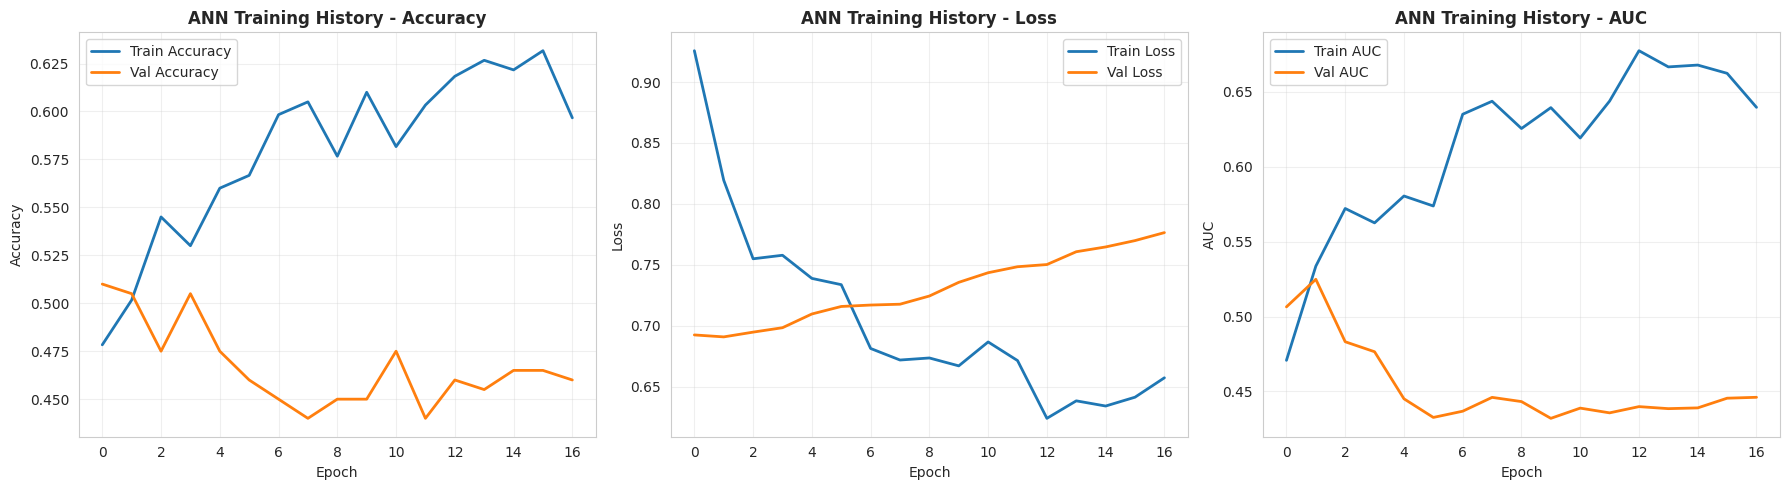

In [19]:
print("Artificial Neural Network with Optuna Tuning")


def create_ann_model(trial):
    n_layers = trial.suggest_int('n_layers', 2, 5)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_eng_scaled.shape[1],)))

    for i in range(n_layers):
        num_units = trial.suggest_int(f'n_units_l{i}', 32, 256)
        model.add(layers.Dense(num_units, activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )

    return model

def objective_ann(trial):
    keras.backend.clear_session()

    model = create_ann_model(trial)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])

    # Class weights for imbalanced data
    class_weight_dict = {0: 1.0, 1: len(y_train[y_train==0]) / len(y_train[y_train==1])}

    early_stop = callbacks.EarlyStopping(monitor='val_auc', patience=10,
                                         restore_best_weights=True, mode='max')

    history = model.fit(
        X_train_eng_scaled, y_train,
        validation_data=(X_val_eng_scaled, y_val),
        epochs=50,
        batch_size=batch_size,
        class_weight=class_weight_dict,
        callbacks=[early_stop],
        verbose=0
    )

    val_auc = max(history.history['val_auc'])
    return val_auc

study_ann = optuna.create_study(direction='maximize', study_name='ANN')
study_ann.optimize(objective_ann, n_trials=20, show_progress_bar=False)

print(f" Best Validation AUC: {study_ann.best_value:.4f}")
print(f" Best parameters: {study_ann.best_params}")
best_params['ANN'] = study_ann.best_params

# Train final ANN model with best parameters
keras.backend.clear_session()
ann_model = create_ann_model(study_ann.best_trial)

class_weight_dict = {0: 1.0, 1: len(y_train[y_train==0]) / len(y_train[y_train==1])}

early_stop = callbacks.EarlyStopping(monitor='val_auc', patience=15,
                                     restore_best_weights=True, mode='max')
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                        patience=5, min_lr=1e-6)

history = ann_model.fit(
    X_train_eng_scaled, y_train,
    validation_data=(X_val_eng_scaled, y_val),
    epochs=100,
    batch_size=study_ann.best_params['batch_size'],
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

models['ANN'] = ann_model

# Predictions
ann_probs = ann_model.predict(X_test_eng_scaled, verbose=0).flatten()
ann_preds = (ann_probs > 0.5).astype(int)
predictions['ANN'] = ann_preds
probabilities['ANN'] = ann_probs

print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final validation AUC: {history.history['val_auc'][-1]:.4f}")
print(f"Epochs trained: {len(history.history['loss'])}")

# Plot training history
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0].set_title('ANN Training History - Accuracy', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[1].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
axes[1].set_title('ANN Training History - Loss', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(history.history['auc'], label='Train AUC', linewidth=2)
axes[2].plot(history.history['val_auc'], label='Val AUC', linewidth=2)
axes[2].set_title('ANN Training History - AUC', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('AUC')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
print("Ensemble Model (Voting Classifier)")


# Create ensemble predictions using weighted voting
print("\nCreating ensemble predictions...")

# Get probabilities from all models
ensemble_probs = np.zeros_like(probabilities['Random Forest'])

# Weight the models based on their CV performance
weights = {
    'Random Forest': study_rf.best_value,
    'XGBoost': study_xgb.best_value,
    'LightGBM': study_lgb.best_value,
    'ANN': study_ann.best_value
}

# Normalize weights
total_weight = sum(weights.values())
normalized_weights = {k: v/total_weight for k, v in weights.items()}

print(f"\nModel weights (based on CV ROC-AUC):")
for model_name, weight in normalized_weights.items():
    print(f"  {model_name}: {weight:.4f}")

# Weighted average of probabilities
for model_name in ['Random Forest', 'XGBoost', 'LightGBM', 'ANN']:
    ensemble_probs += normalized_weights[model_name] * probabilities[model_name]

ensemble_preds = (ensemble_probs > 0.5).astype(int)

predictions['Ensemble'] = ensemble_preds
probabilities['Ensemble'] = ensemble_probs
models['Ensemble'] = 'Weighted Ensemble'

print("Ensemble model created")

Ensemble Model (Voting Classifier)

Creating ensemble predictions...

Model weights (based on CV ROC-AUC):
  Random Forest: 0.2304
  XGBoost: 0.2393
  LightGBM: 0.2447
  ANN: 0.2855
Ensemble model created


In [21]:
#performance evaluation

# Calculate metrics for all models
results = []

for model_name in predictions.keys():
    y_pred = predictions[model_name]
    y_prob = probabilities[model_name]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"\n{model_name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('ROC-AUC', ascending=False)

print("Model Comparison Summary")
print(results_df.to_string(index=False))


Random Forest:
  Accuracy:  0.4350
  Precision: 0.4630
  Recall:    0.4762
  F1-Score:  0.4695
  ROC-AUC:   0.4557

XGBoost:
  Accuracy:  0.5150
  Precision: 0.5357
  Recall:    0.5714
  F1-Score:  0.5530
  ROC-AUC:   0.4810

LightGBM:
  Accuracy:  0.4850
  Precision: 0.5083
  Recall:    0.5810
  F1-Score:  0.5422
  ROC-AUC:   0.4927

ANN:
  Accuracy:  0.5150
  Precision: 0.5377
  Recall:    0.5429
  F1-Score:  0.5403
  ROC-AUC:   0.4817

Ensemble:
  Accuracy:  0.4850
  Precision: 0.5088
  Recall:    0.5524
  F1-Score:  0.5297
  ROC-AUC:   0.4808
Model Comparison Summary
        Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
     LightGBM     0.485   0.508333 0.580952  0.542222 0.492732
          ANN     0.515   0.537736 0.542857  0.540284 0.481704
      XGBoost     0.515   0.535714 0.571429  0.552995 0.481003
     Ensemble     0.485   0.508772 0.552381  0.529680 0.480802
Random Forest     0.435   0.462963 0.476190  0.469484 0.455739


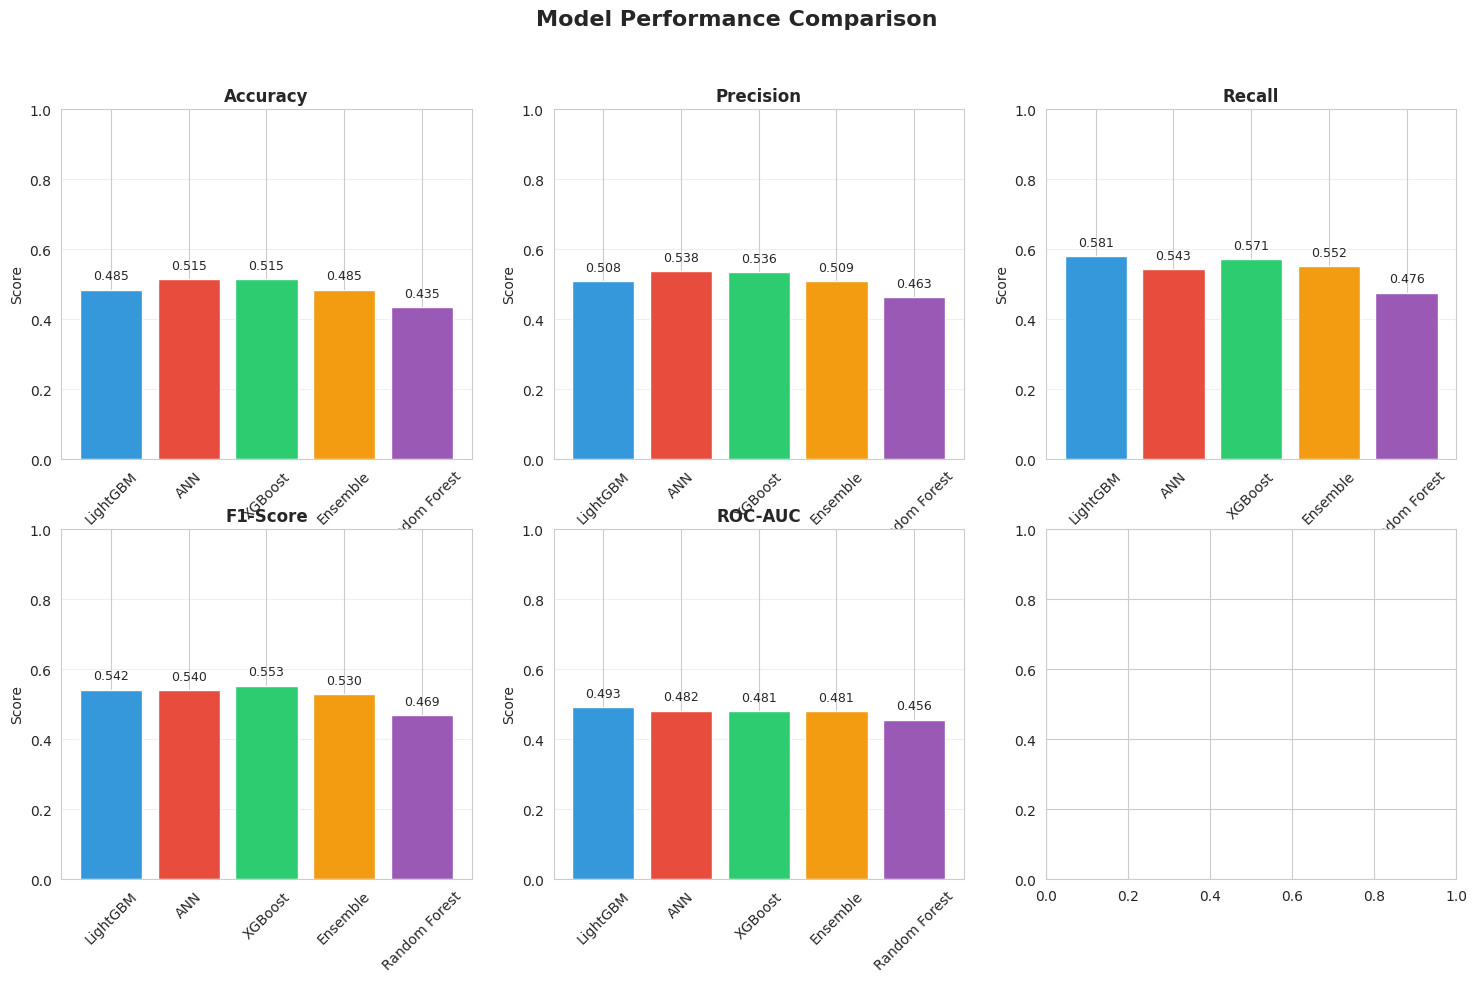

In [22]:
# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3

    axes[row, col].bar(results_df['Model'], results_df[metric], color=colors)
    axes[row, col].set_title(metric, fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Score')
    axes[row, col].set_ylim(0, 1)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(results_df[metric]):
        axes[row, col].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

<Figure size 1200x600 with 0 Axes>


5.3 ROC Curves
--------------------------------------------------


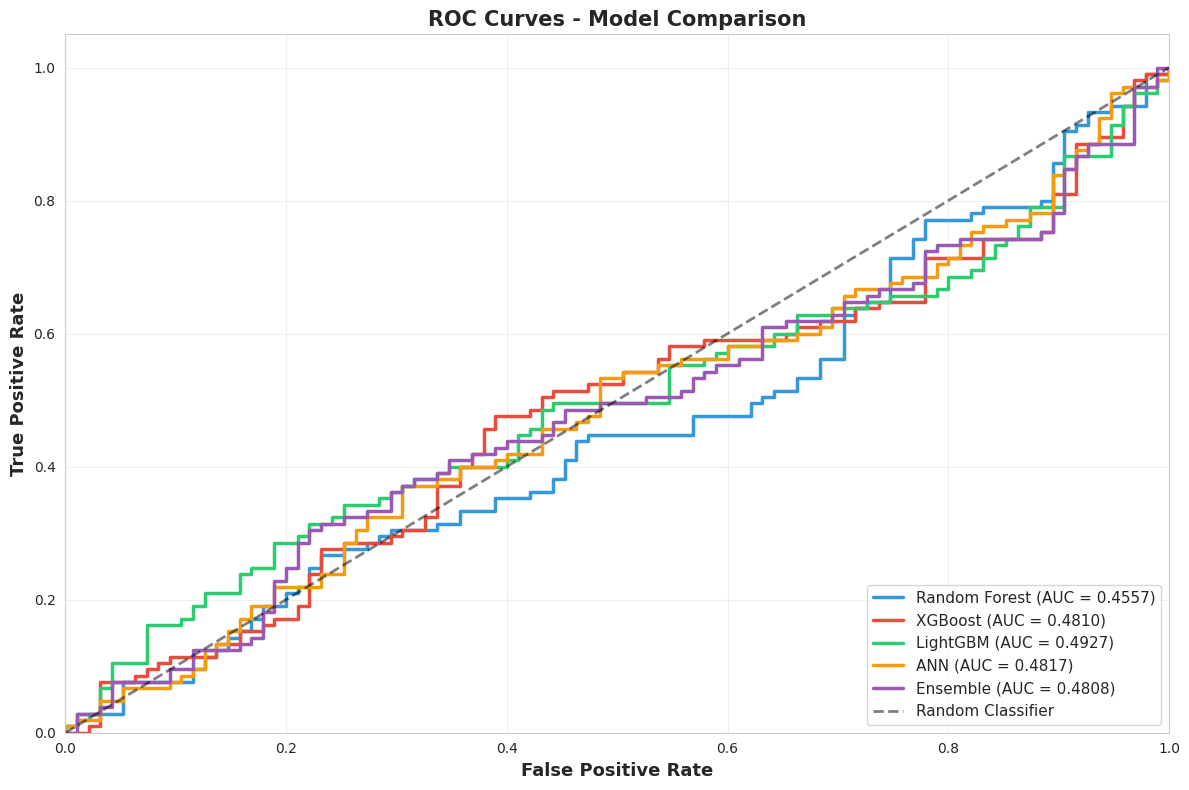

In [23]:
# Overall comparison summary
axes[1, 2].axis('off')
summary_text = "Model Rankings:\n\n"
for i, row in results_df.iterrows():
    rank = list(results_df.index).index(i) + 1
    summary_text += f"#{rank} {row['Model']}:\n"
    summary_text += f"  AUC: {row['ROC-AUC']:.4f}\n"
    summary_text += f"  F1:  {row['F1-Score']:.4f}\n\n"

axes[1, 2].text(0.1, 0.9, summary_text, transform=axes[1, 2].transAxes,
                fontsize=10, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n5.3 ROC Curves")
print("-" * 50)

plt.figure(figsize=(12, 8))

colors_roc = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
for idx, model_name in enumerate(predictions.keys()):
    y_prob = probabilities[model_name]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, linewidth=2.5, label=f'{model_name} (AUC = {roc_auc:.4f})',
             color=colors_roc[idx])

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=13, fontweight='bold')
plt.title('ROC Curves - Model Comparison', fontsize=15, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Confusion Matrices


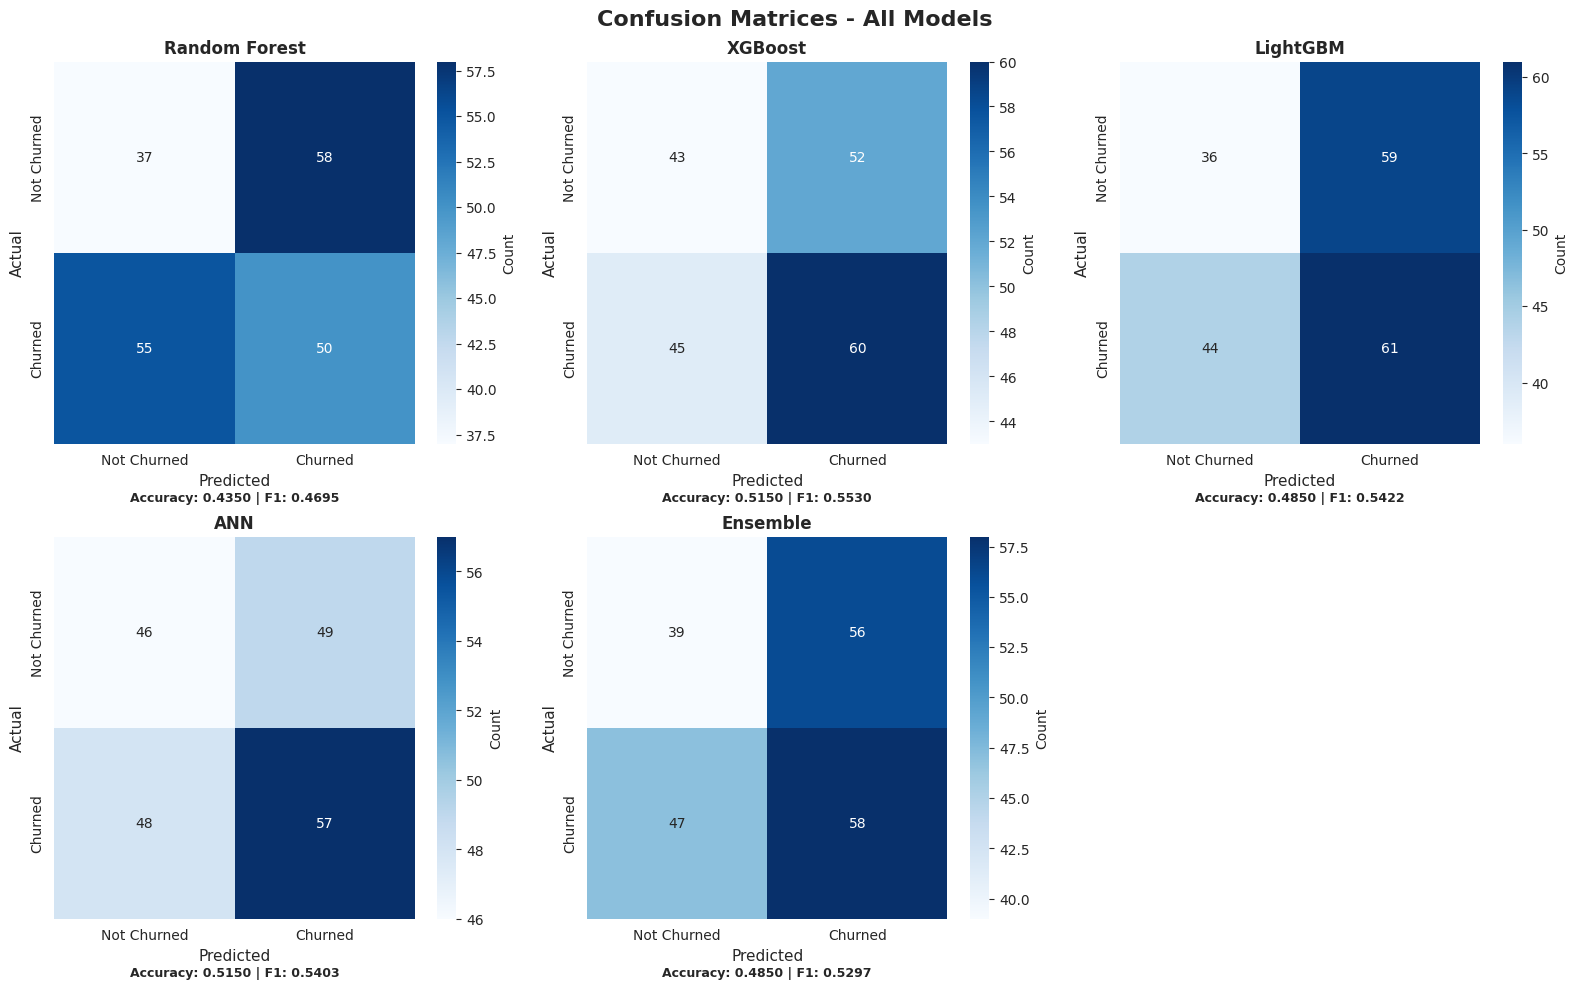


5.5 Detailed Classification Reports
--------------------------------------------------

Random Forest:
----------------------------------------
              precision    recall  f1-score   support

 Not Churned     0.4022    0.3895    0.3957        95
     Churned     0.4630    0.4762    0.4695       105

    accuracy                         0.4350       200
   macro avg     0.4326    0.4328    0.4326       200
weighted avg     0.4341    0.4350    0.4344       200


XGBoost:
----------------------------------------
              precision    recall  f1-score   support

 Not Churned     0.4886    0.4526    0.4699        95
     Churned     0.5357    0.5714    0.5530       105

    accuracy                         0.5150       200
   macro avg     0.5122    0.5120    0.5115       200
weighted avg     0.5134    0.5150    0.5135       200


LightGBM:
----------------------------------------
              precision    recall  f1-score   support

 Not Churned     0.4500    0.3789    0.4114

In [24]:
print("Confusion Matrices")


fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, model_name in enumerate(predictions.keys()):
    y_pred = predictions[model_name]
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'],
                cbar_kws={'label': 'Count'})

    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=11)
    axes[idx].set_xlabel('Predicted', fontsize=11)

    # Add metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    axes[idx].text(0.5, -0.15, f'Accuracy: {accuracy:.4f} | F1: {f1:.4f}',
                   transform=axes[idx].transAxes,
                   ha='center', fontsize=9, fontweight='bold')

# Hide the last unused subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

print("\n5.5 Detailed Classification Reports")
print("-" * 50)

for model_name in predictions.keys():
    print(f"\n{model_name}:")
    print("-" * 40)
    y_pred = predictions[model_name]
    print(classification_report(y_test, y_pred,
                                target_names=['Not Churned', 'Churned'],
                                digits=4))


# Feature Importance

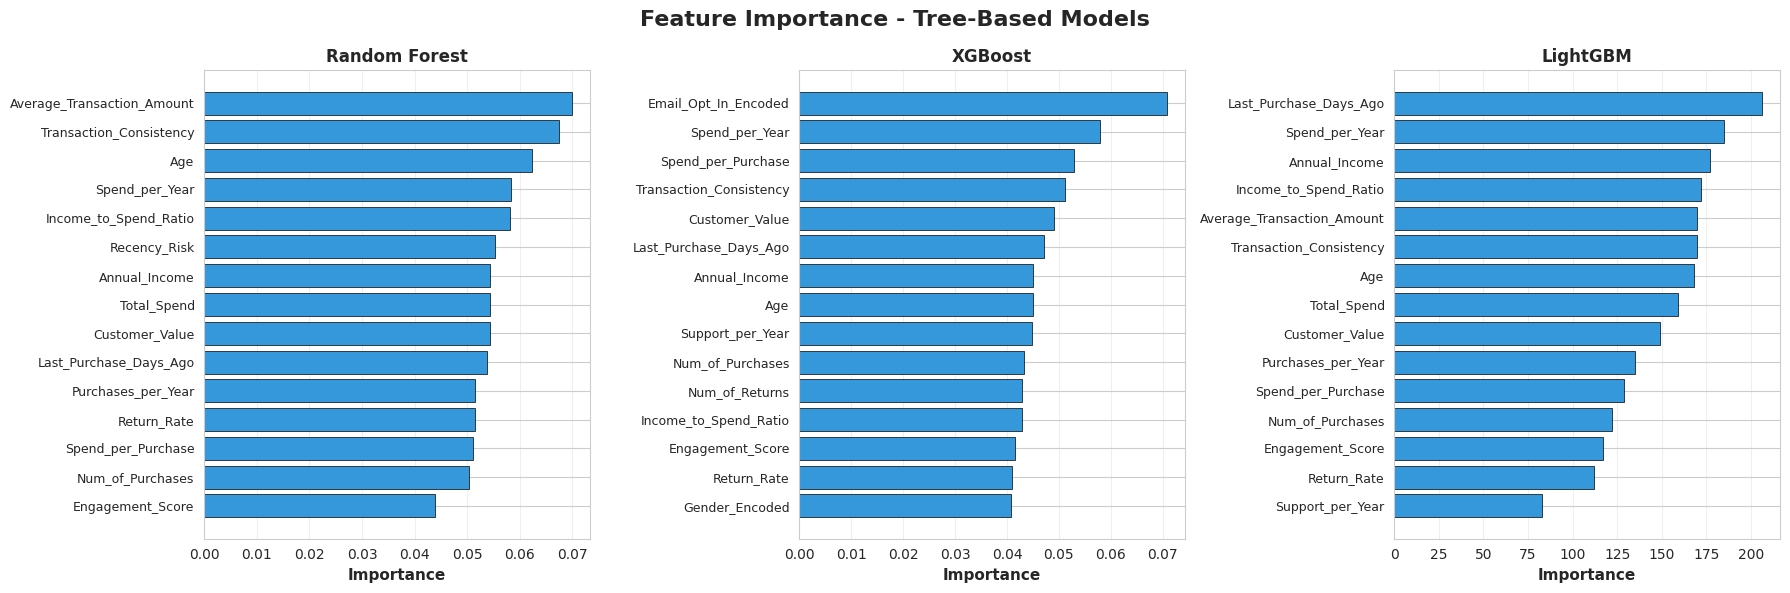


5.7 Cross-Validation Scores
--------------------------------------------------

Random Forest:
  CV ROC-AUC Scores: [0.43415179 0.49429128 0.53299916 0.41798942 0.45252019]
  Mean: 0.4664 (+/- 0.0839)

XGBoost:
  CV ROC-AUC Scores: [0.37918527 0.50960735 0.53411306 0.42133111 0.57727652]
  Mean: 0.4843 (+/- 0.1464)

LightGBM:
  CV ROC-AUC Scores: [0.40513393 0.50654414 0.57449179 0.43302701 0.5572264 ]
  Mean: 0.4953 (+/- 0.1334)


In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Feature Importance - Tree-Based Models', fontsize=16, fontweight='bold')

tree_models = ['Random Forest', 'XGBoost', 'LightGBM']
feature_names = X_train_eng.columns

for idx, model_name in enumerate(tree_models):
    model = models[model_name]
    importances = model.feature_importances_

    # Get top 15 features
    indices = np.argsort(importances)[-15:]

    axes[idx].barh(range(len(indices)), importances[indices],
                   color='#3498db', edgecolor='black', linewidth=0.5)
    axes[idx].set_yticks(range(len(indices)))
    axes[idx].set_yticklabels([feature_names[i] for i in indices], fontsize=9)
    axes[idx].set_xlabel('Importance', fontsize=11, fontweight='bold')
    axes[idx].set_title(model_name, fontsize=12, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


cv_results = {}

for model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
    model = models[model_name]
    cv_scores = cross_val_score(model, X_train_eng_scaled, y_train,
                                 cv=cv, scoring='roc_auc', n_jobs=-1)
    cv_results[model_name] = cv_scores

    print(f"\n{model_name}:")
    print(f"  CV ROC-AUC Scores: {cv_scores}")
    print(f"  Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

